In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
%matplotlib inline    
import matplotlib as mpl
import seaborn as sns


In [93]:
df_diamonds=pd.read_csv("/Users/aditinarayan/Downloads/diamonds.csv")

In [94]:
df_diamonds.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [95]:
df=df_diamonds

In [96]:
df.shape

(53940, 11)

In [97]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [98]:
df.drop(["Unnamed: 0"], axis=1,inplace=True)

In [99]:
df = df.drop(df[df["x"] == 0].index)
df = df.drop(df[df["y"] == 0].index)
df = df.drop(df[df["z"] == 0].index)

In [100]:
df.describe()

,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [101]:
df.shape

(53920, 10)

In [102]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [103]:
print(df.isnull().sum()) 

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64


In [104]:
correlation_matrix = df.corr()
print(correlation_matrix)

          carat     depth     table     price         x         y         z
carat  1.000000  0.028259  0.181646  0.921592  0.977779  0.953991  0.961048
depth  0.028259  1.000000 -0.295733 -0.010729 -0.025017 -0.029069  0.095023
table  0.181646 -0.295733  1.000000  0.127245  0.196097  0.184493  0.152483
price  0.921592 -0.010729  0.127245  1.000000  0.887231  0.867864  0.868206
x      0.977779 -0.025017  0.196097  0.887231  1.000000  0.974918  0.975435
y      0.953991 -0.029069  0.184493  0.867864  0.974918  1.000000  0.956744
z      0.961048  0.095023  0.152483  0.868206  0.975435  0.956744  1.000000


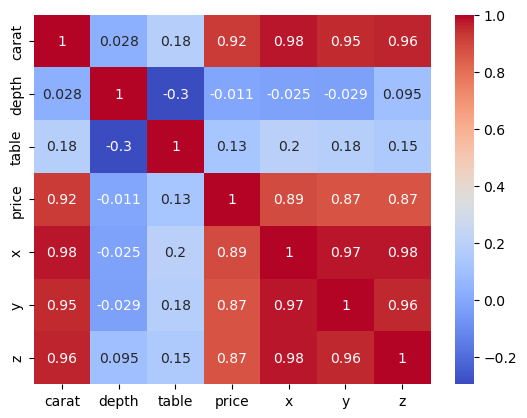

In [105]:

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


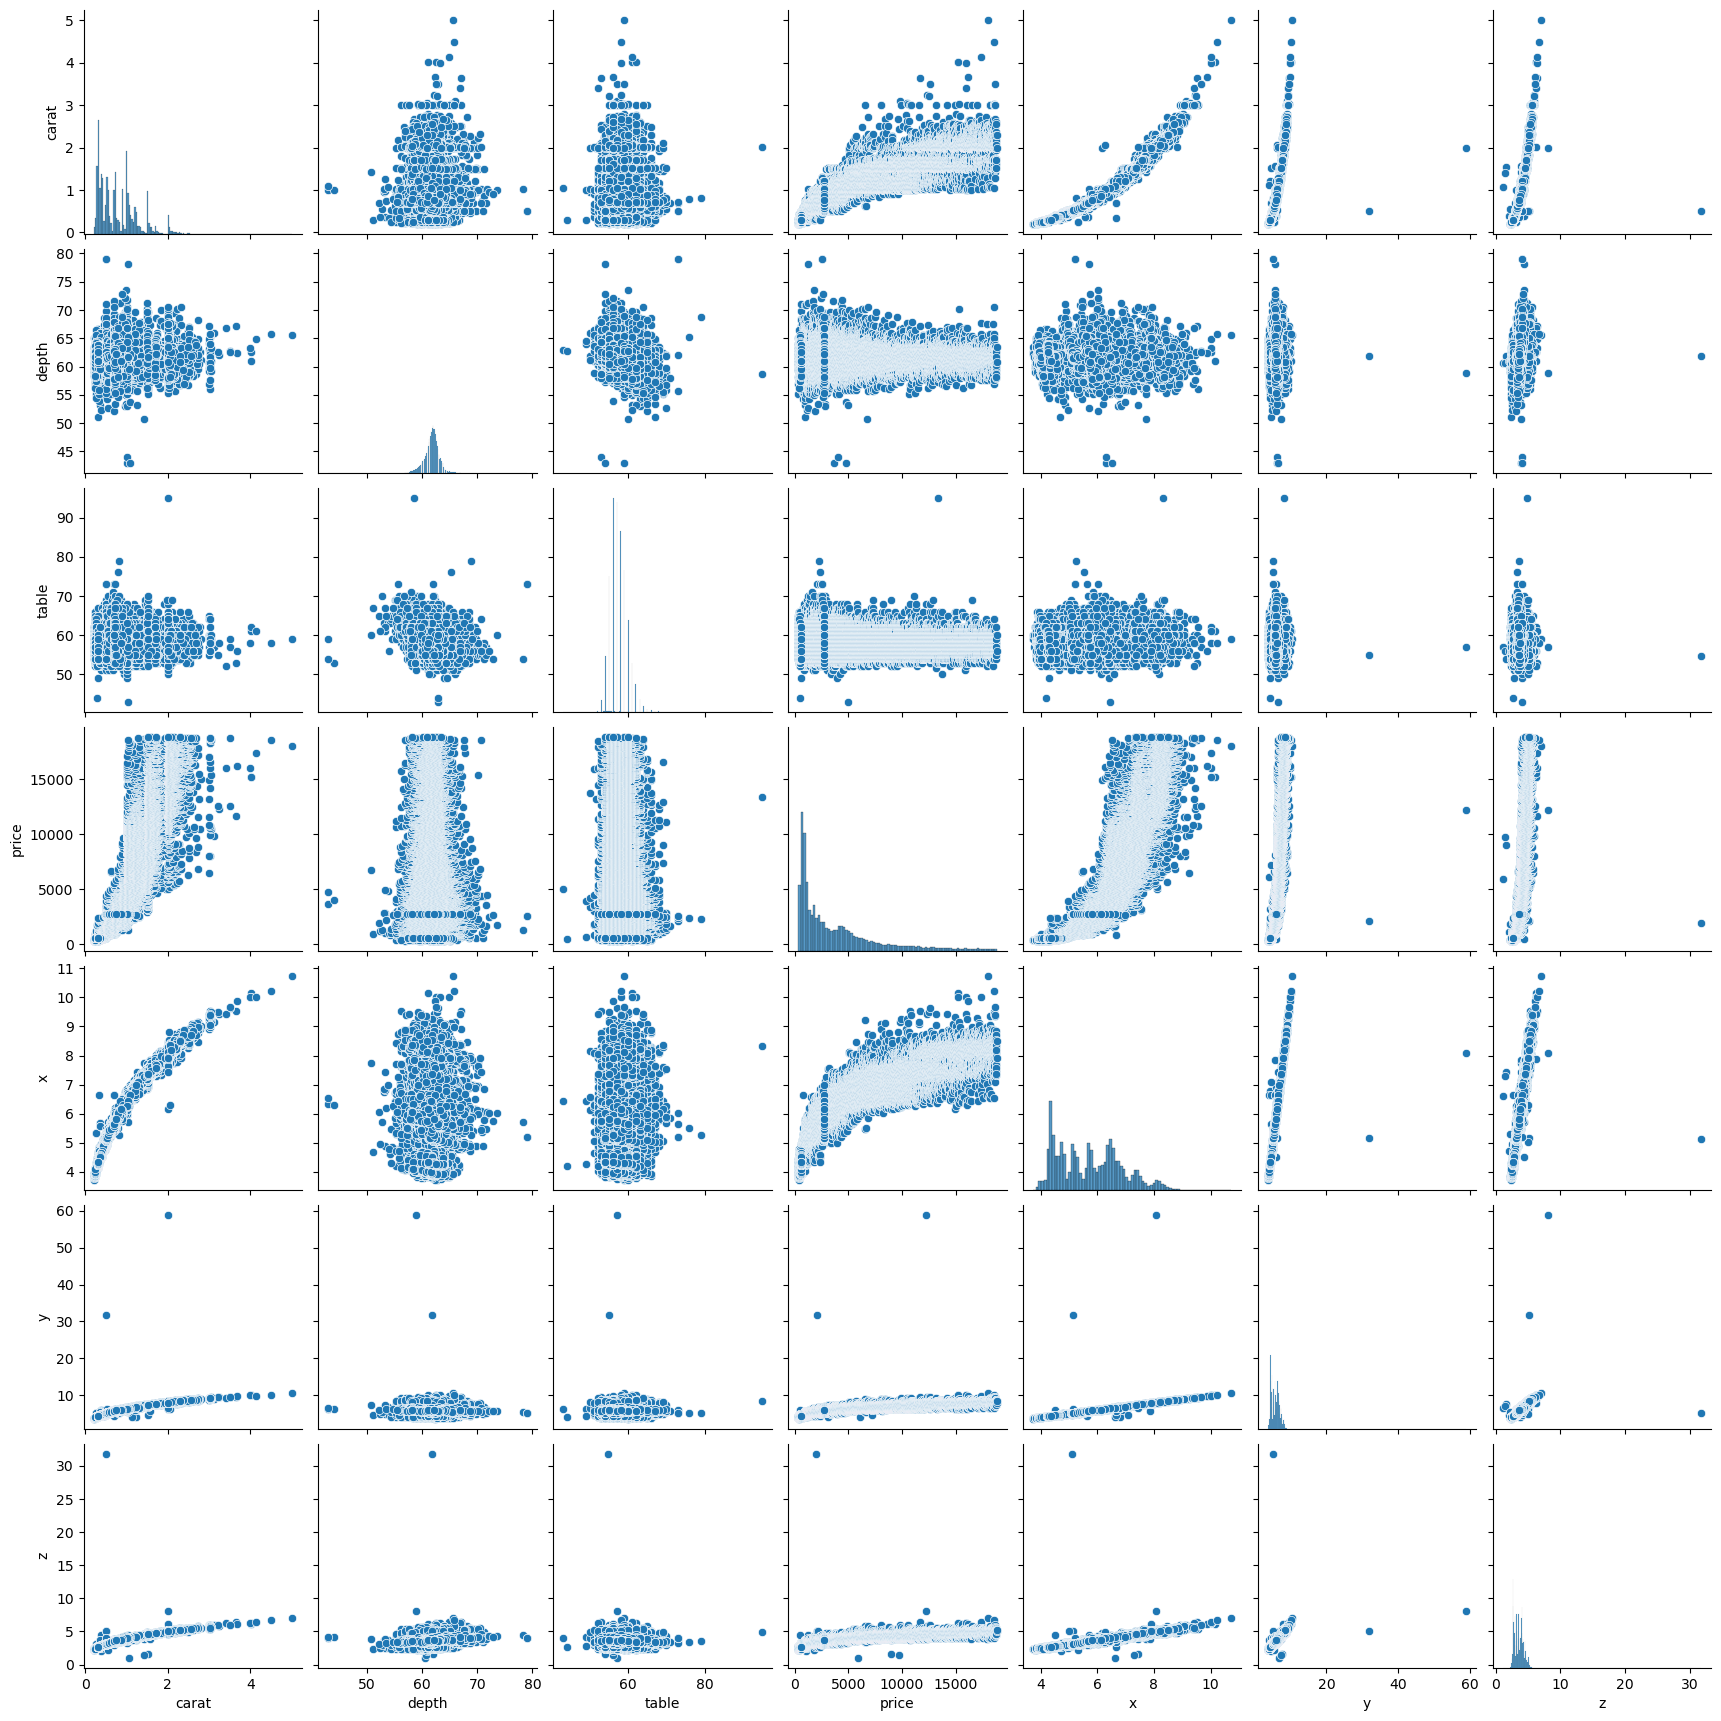

In [106]:
sns.pairplot(df[['carat', 'depth', 'table', 'price', 'x', 'y', 'z']])
plt.show()

In [107]:
df = df[(df["table"]<80)&(df["table"]>40)]
df = df[(df["x"]<10.5)]
df = df[(df["y"]<30)]
df = df[(df["z"]<30)&(df["z"]>2)]
df=df[(df["depth"]<75)&(df["depth"]>50)]
df = df[(df["carat"]<4)]
df.shape


(53901, 10)

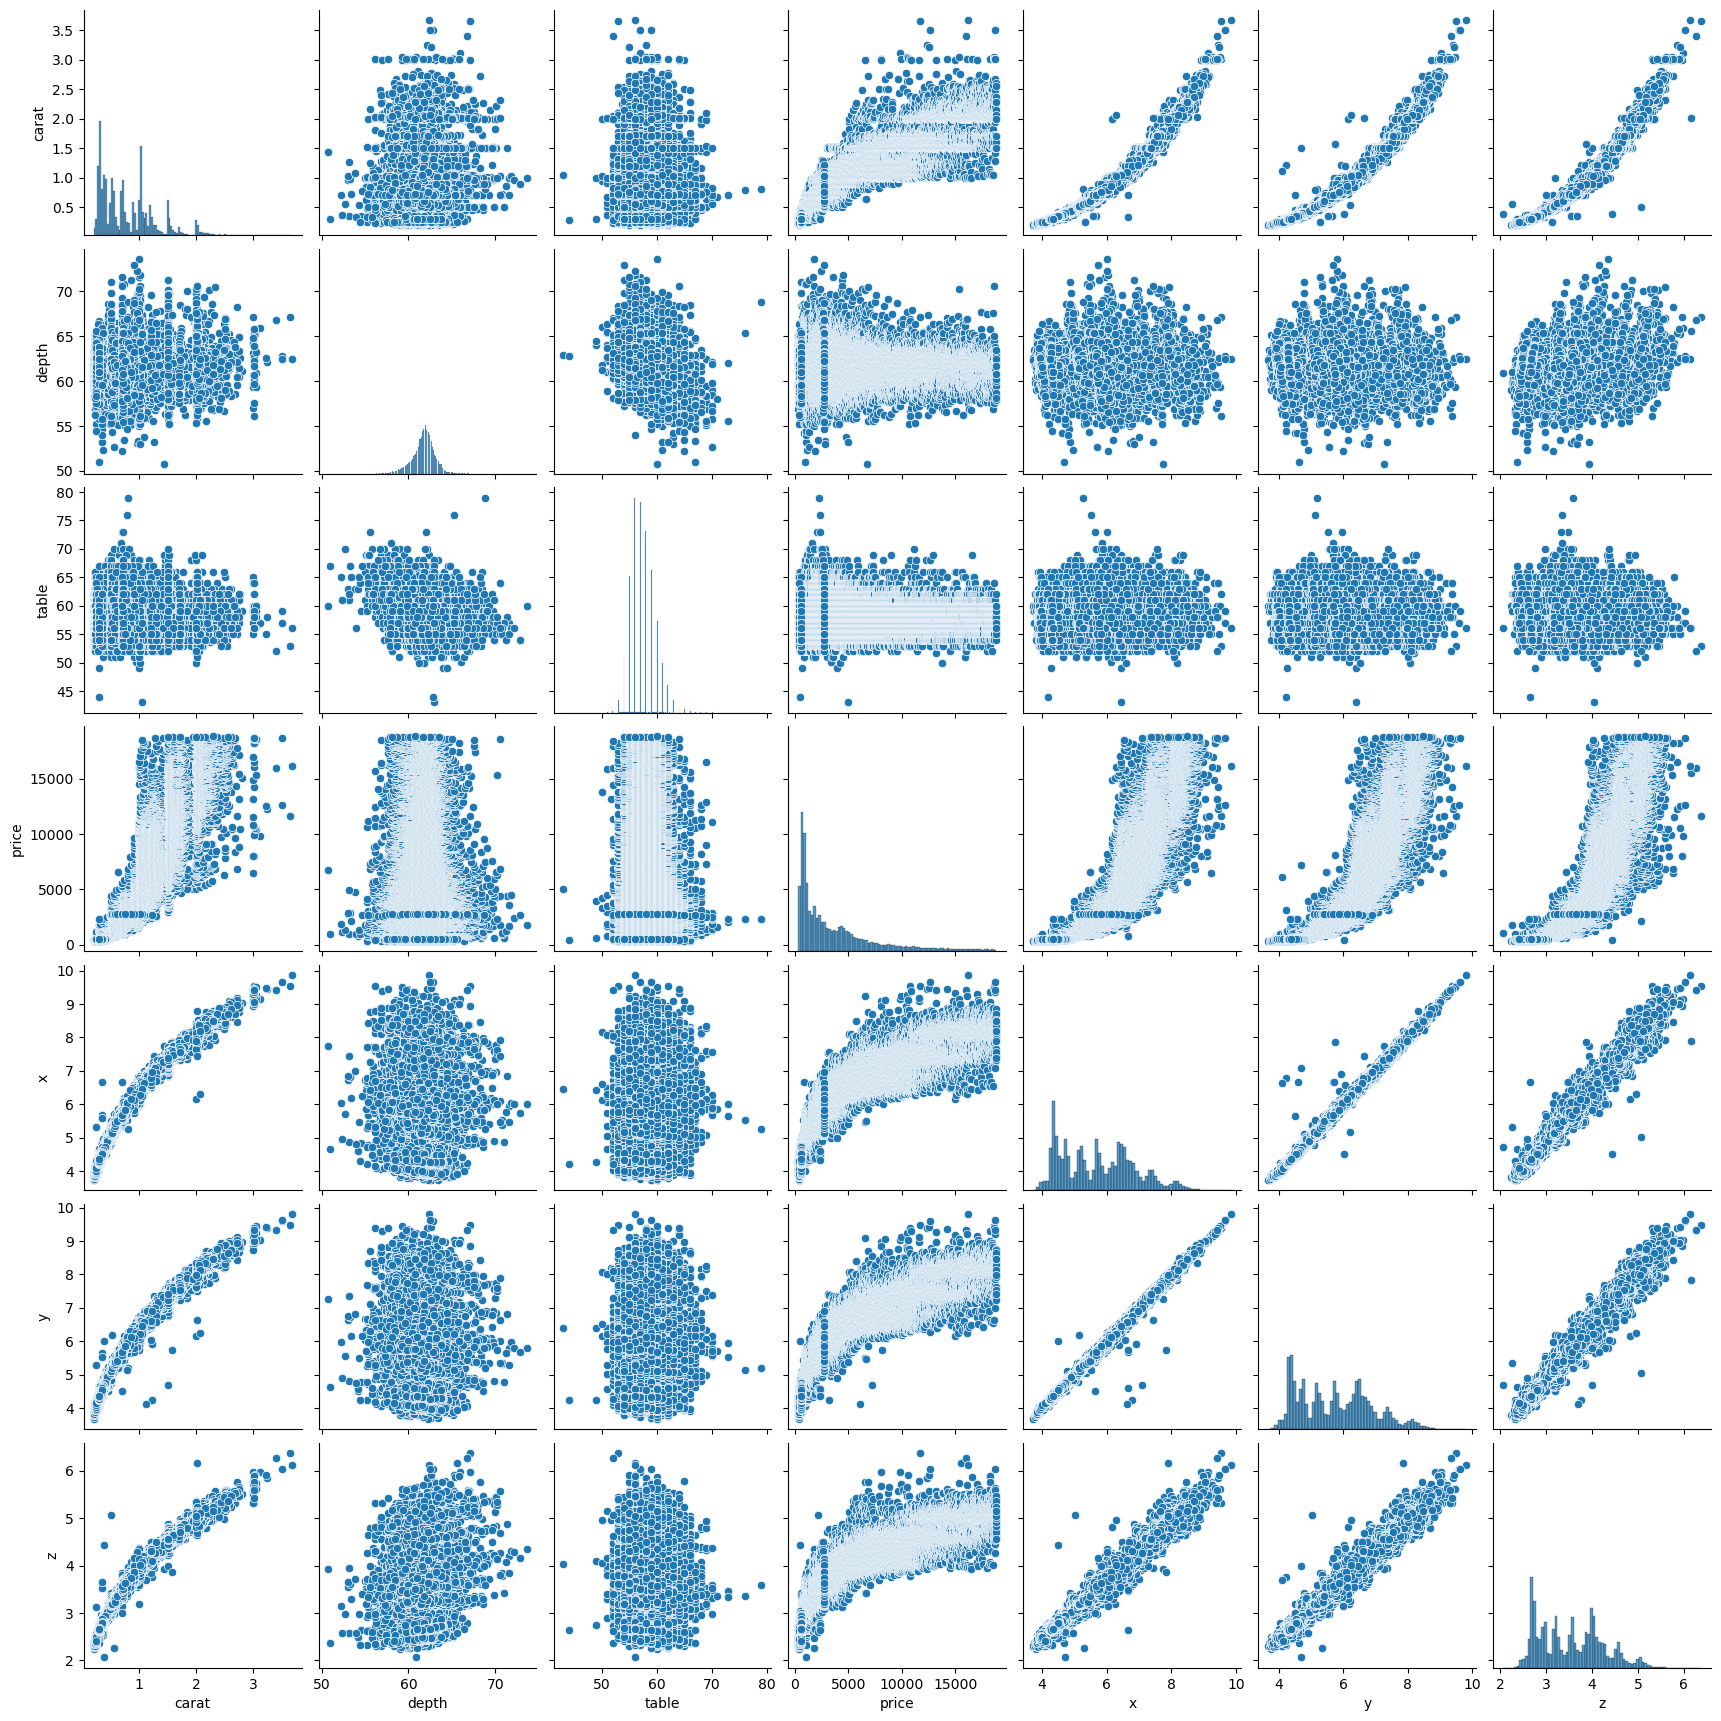

In [108]:
sns.pairplot(df[['carat', 'depth', 'table', 'price', 'x', 'y', 'z']])
plt.show()

In [109]:
df_diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [110]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [111]:
df['carat'].unique()

array([0.23, 0.21, 0.29, 0.31, 0.24, 0.26, 0.22, 0.3 , 0.2 , 0.32, 0.33,
       0.25, 0.35, 0.42, 0.28, 0.38, 0.7 , 0.86, 0.71, 0.78, 0.96, 0.73,
       0.8 , 0.75, 0.74, 0.81, 0.59, 0.9 , 0.91, 0.61, 0.77, 0.63, 0.76,
       0.64, 0.72, 0.79, 0.58, 1.17, 0.6 , 0.83, 0.54, 0.98, 0.52, 1.01,
       0.53, 0.84, 0.51, 1.05, 0.55, 0.87, 1.  , 0.57, 0.82, 1.04, 0.93,
       1.2 , 0.99, 0.34, 0.43, 0.36, 0.95, 0.89, 1.02, 0.97, 0.56, 0.85,
       0.92, 1.27, 0.66, 1.12, 0.68, 1.03, 0.62, 1.22, 1.08, 0.88, 0.5 ,
       1.19, 0.39, 0.65, 1.24, 1.5 , 0.27, 0.41, 1.13, 1.06, 0.69, 0.4 ,
       1.14, 0.94, 1.29, 1.52, 1.16, 1.21, 1.23, 1.09, 0.67, 1.11, 1.1 ,
       1.18, 1.15, 1.25, 1.07, 1.28, 1.51, 0.37, 1.31, 1.26, 1.39, 1.44,
       1.35, 1.3 , 1.32, 1.41, 1.36, 1.45, 1.34, 1.58, 1.54, 1.38, 1.33,
       1.74, 1.64, 1.47, 1.4 , 1.55, 1.95, 2.  , 1.37, 1.83, 1.62, 1.57,
       1.69, 2.06, 1.72, 1.66, 2.14, 1.49, 1.46, 2.15, 1.96, 2.22, 1.7 ,
       1.53, 1.85, 2.01, 2.27, 1.68, 1.56, 1.81, 1.

In [112]:
df['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [113]:
df['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [114]:
df['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [115]:
df['depth'].unique()

array([61.5, 59.8, 56.9, 62.4, 63.3, 62.8, 62.3, 61.9, 65.1, 59.4, 64. ,
       60.4, 62.2, 60.2, 60.9, 62. , 63.4, 63.8, 62.7, 61. , 58.1, 62.5,
       60.5, 60. , 60.7, 59.5, 58.2, 64.1, 60.8, 61.8, 61.2, 61.1, 65.2,
       58.4, 63.1, 61.6, 59.3, 62.6, 63. , 63.2, 62.1, 61.4, 62.9, 63.7,
       59.2, 59.9, 57.9, 55.1, 57.5, 66.3, 61.7, 58.8, 64.5, 65.3, 59.6,
       64.4, 65.7, 63.6, 61.3, 60.1, 60.3, 58. , 64.6, 59.7, 57.8, 67.9,
       60.6, 57.2, 64.2, 65.8, 67.4, 59. , 63.5, 67.3, 58.7, 66.4, 68.1,
       63.9, 55. , 58.6, 64.3, 58.5, 65. , 56. , 58.3, 53.1, 64.9, 59.1,
       58.9, 66.7, 57.7, 65.4, 53.3, 53. , 67.8, 66.1, 55.8, 67.6, 68.2,
       65.5, 67.7, 69.5, 56.6, 56.3, 66.9, 66. , 67. , 57.6, 67.1, 65.6,
       64.8, 69.3, 66.2, 55.4, 66.8, 64.7, 66.6, 55.9, 57.3, 57.4, 68.3,
       68.5, 56.2, 65.9, 56.5, 56.1, 66.5, 68.4, 69.7, 57.1, 68.7, 56.7,
       68.6, 71.6, 68.8, 67.5, 69. , 55.2, 68.9, 69.6, 57. , 56.4, 56.8,
       67.2, 70.1, 71.3, 70.6, 69.8, 71.8, 53.8, 53

In [116]:
df['table'].unique()

array([55. , 61. , 65. , 58. , 57. , 56. , 54. , 62. , 59. , 63. , 60. ,
       55.3, 69. , 53. , 64. , 56.4, 60.5, 67. , 52. , 55.8, 66. , 70. ,
       68. , 54.4, 57.1, 53.6, 54.8, 54.2, 54.9, 56.7, 53.9, 57.8, 54.1,
       55.1, 51. , 58.1, 56.9, 56.5, 53.7, 60.7, 56.2, 56.6, 56.1, 56.3,
       57.2, 57.5, 60.9, 59.8, 62.3, 60.1, 55.9, 50.1, 62.2, 54.5, 55.7,
       53.4, 54.7, 58.8, 59.4, 62.5, 54.3, 60.6, 55.2, 58.6, 49. , 50. ,
       54.6, 62.6, 57.7, 56.8, 57.9, 60.3, 55.6, 59.5, 57.4, 62.4, 60.4,
       53.3, 60.2, 60.8, 58.5, 57.6, 43. , 59.9, 63.5, 57.3, 61.4, 58.3,
       55.4, 58.2, 53.5, 59.7, 55.5, 58.7, 53.8, 59.1, 53.2, 59.3, 61.1,
       51.6, 61.2, 59.2, 58.4, 53.1, 52.8, 44. , 61.3, 61.9, 61.8, 59.6,
       61.5, 58.9, 64.3, 62.8, 71. , 52.4, 63.3, 61.7, 64.2, 73. , 65.4,
       63.4, 62.1, 79. , 76. , 61.6])

In [117]:
df['price'].unique()

array([ 326,  327,  334, ..., 2753, 2755, 2756])

In [118]:
#one hot encoding
df = pd.get_dummies(df, columns=["cut", "color", "clarity"])


In [121]:
df


,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,0,0,1,...,0,0,0,0,1,0,0,0,0,0
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,0,1,0,...,0,0,0,0,1,0,0,0,0,0
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [126]:
df.columns

Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z', 'cut_Fair',
       'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_D',
       'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J',
       'clarity_I1', 'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
       'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2'],
      dtype='object')

In [127]:
df.describe()

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
count,53901.000000,53901.000000,53901.000000,53901.000000,53901.000000,53901.000000,53901.000000,53901.000000,53901.000000,53901.000000,...,53901.000000,53901.000000,53901.000000,53901.000000,53901.000000,53901.000000,53901.000000,53901.000000,53901.000000,53901.000000
mean,0.797241,61.749511,57.455684,3929.161036,5.730967,5.732807,3.539114,0.029684,0.090945,0.399677,...,0.100518,0.052021,0.013562,0.033209,0.242278,0.170386,0.151519,0.227269,0.067791,0.093987
std,0.472351,1.419915,2.226074,3985.117237,1.118454,1.110361,0.690771,0.169716,0.287533,0.489836,...,0.300692,0.222072,0.115664,0.179184,0.428465,0.375975,0.358557,0.419071,0.251389,0.291814
min,0.200000,50.800000,43.000000,326.000000,3.730000,3.680000,2.060000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.700000,61.800000,57.000000,2400.000000,5.700000,5.710000,3.530000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.040000,62.500000,59.000000,5321.000000,6.540000,6.540000,4.030000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.670000,73.600000,79.000000,18823.000000,9.860000,9.810000,6.380000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [132]:
df.corr()

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
carat,1.000000,-0.048159,0.346634,0.986577,0.999090,0.999053,0.998636,0.125351,0.052991,-0.310884,...,0.320025,0.339671,0.157125,-0.301772,0.166044,0.528778,-0.116112,-0.055775,-0.399079,-0.318792
depth,-0.048159,1.000000,-0.453047,-0.081524,-0.074992,-0.075113,-0.007537,0.439020,0.188196,0.106410,...,0.018456,0.008716,0.139111,-0.036895,0.068518,-0.025240,-0.033977,-0.019235,-0.018700,-0.012537
table,0.346634,-0.453047,1.000000,0.302944,0.360680,0.355896,0.328680,0.128675,0.256668,-0.820203,...,0.077206,0.121309,0.080125,-0.239606,0.149093,0.277648,-0.075546,-0.020603,-0.224615,-0.195602
price,0.986577,-0.081524,0.302944,1.000000,0.984748,0.985477,0.982357,0.064678,0.017834,-0.256141,...,0.291327,0.291156,0.086557,-0.263677,0.128569,0.461570,-0.085601,-0.030758,-0.361500,-0.268613
x,0.999090,-0.074992,0.360680,0.984748,1.000000,0.999914,0.997703,0.116581,0.051205,-0.315544,...,0.312434,0.333824,0.152399,-0.307264,0.173932,0.531541,-0.115592,-0.054742,-0.407808,-0.324491
y,0.999053,-0.075113,0.355896,0.985477,0.999914,1.000000,0.997685,0.110902,0.051971,-0.311350,...,0.312959,0.334214,0.149018,-0.305604,0.173552,0.529835,-0.114705,-0.055252,-0.406528,-0.322662
z,0.998636,-0.007537,0.328680,0.982357,0.997703,0.997685,1.000000,0.144656,0.063502,-0.306997,...,0.314589,0.335480,0.161236,-0.309612,0.178457,0.530519,-0.117764,-0.056482,-0.409345,-0.325297
cut_Fair,0.125351,0.439020,0.128675,0.064678,0.116581,0.110902,0.144656,1.000000,0.002381,-0.173768,...,0.024292,0.040568,0.325746,-0.096356,0.042244,0.132166,-0.052477,-0.047733,-0.109889,-0.086168
cut_Good,0.052991,0.188196,0.256668,0.017834,0.051205,0.051971,0.063502,0.002381,1.000000,-0.299316,...,0.016951,0.034089,0.031163,-0.096210,0.129459,0.093047,-0.043372,-0.039825,-0.094195,-0.093257
cut_Ideal,-0.310884,0.106410,-0.820203,-0.256141,-0.315544,-0.311350,-0.306997,-0.173768,-0.299316,1.000000,...,-0.062610,-0.119551,-0.093721,0.264411,-0.189230,-0.270462,0.086144,0.032019,0.234024,0.199516


In [133]:
print(df.corr())

                  carat     depth     table     price         x         y  \
carat          1.000000 -0.048159  0.346634  0.986577  0.999090  0.999053   
depth         -0.048159  1.000000 -0.453047 -0.081524 -0.074992 -0.075113   
table          0.346634 -0.453047  1.000000  0.302944  0.360680  0.355896   
price          0.986577 -0.081524  0.302944  1.000000  0.984748  0.985477   
x              0.999090 -0.074992  0.360680  0.984748  1.000000  0.999914   
y              0.999053 -0.075113  0.355896  0.985477  0.999914  1.000000   
z              0.998636 -0.007537  0.328680  0.982357  0.997703  0.997685   
cut_Fair       0.125351  0.439020  0.128675  0.064678  0.116581  0.110902   
cut_Good       0.052991  0.188196  0.256668  0.017834  0.051205  0.051971   
cut_Ideal     -0.310884  0.106410 -0.820203 -0.256141 -0.315544 -0.311350   
cut_Premium    0.278569 -0.402866  0.617855  0.258594  0.290291  0.280555   
cut_Very Good  0.034075  0.025657  0.222938  0.026021  0.031634  0.038499   

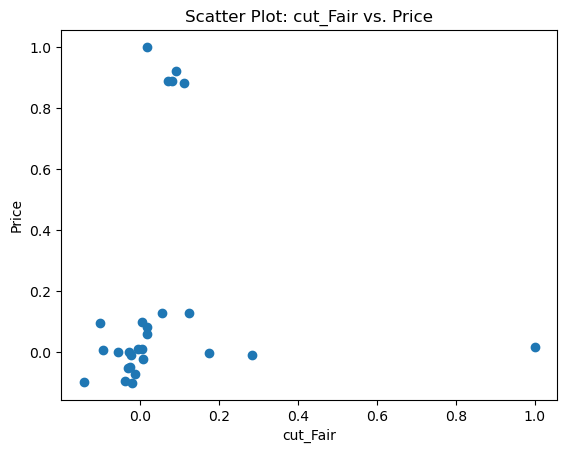

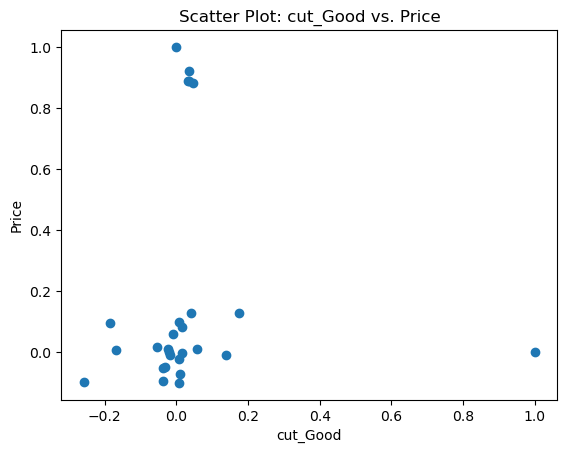

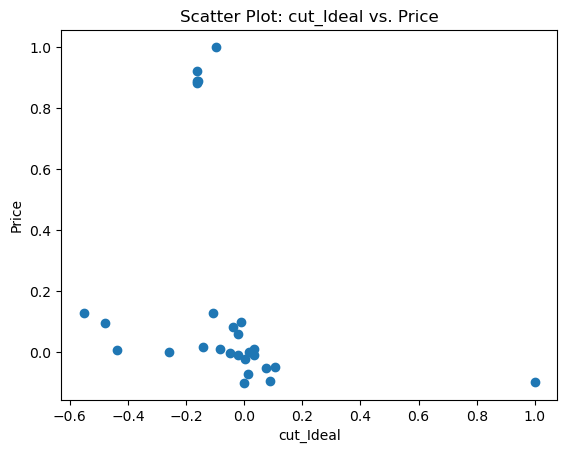

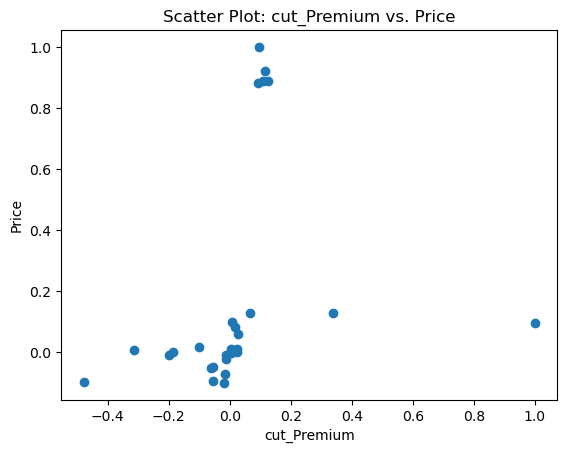

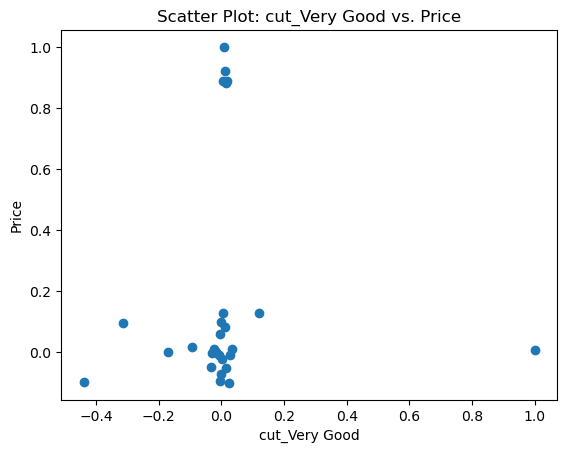

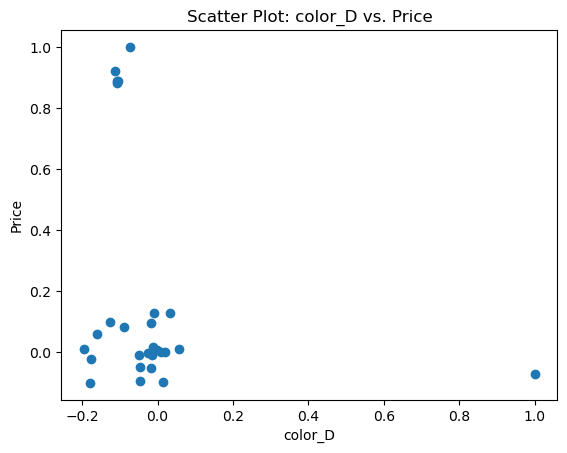

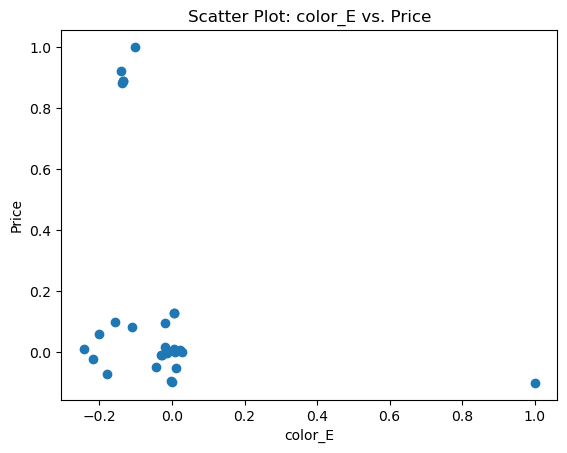

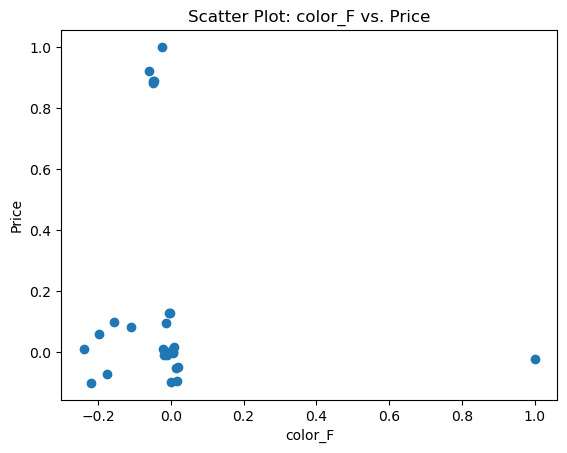

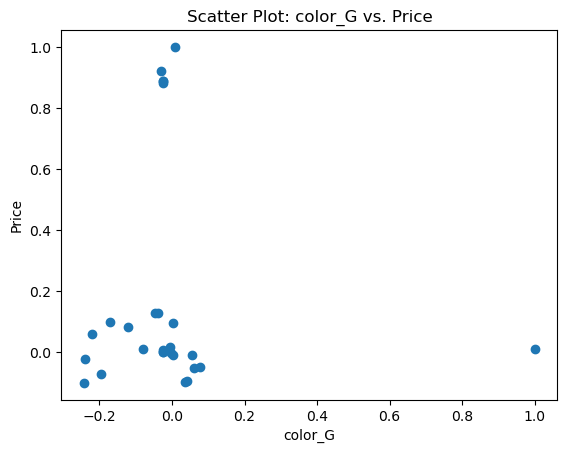

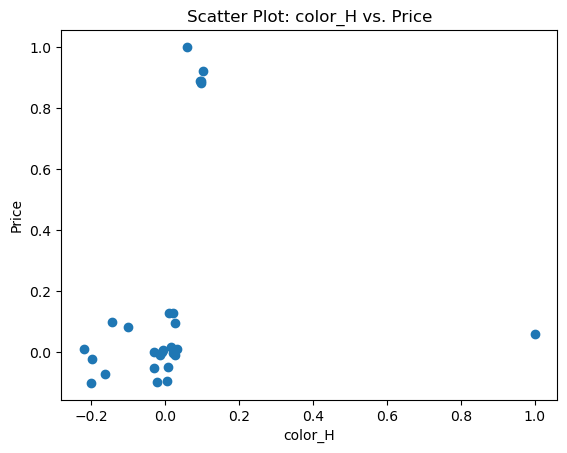

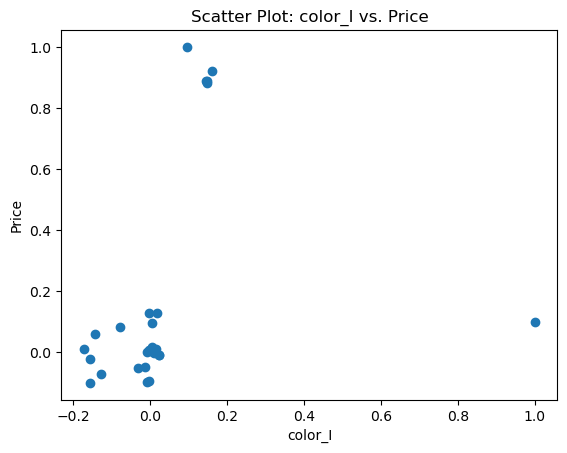

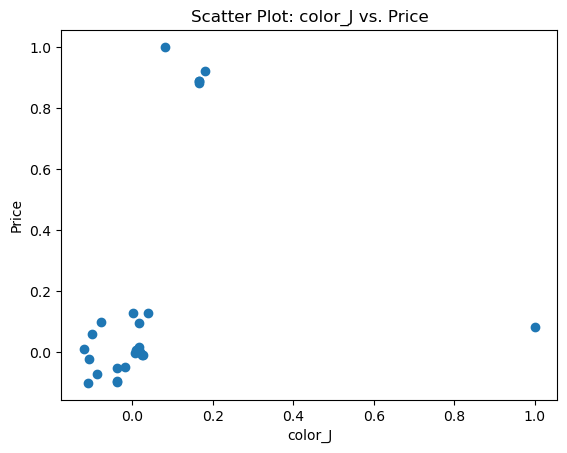

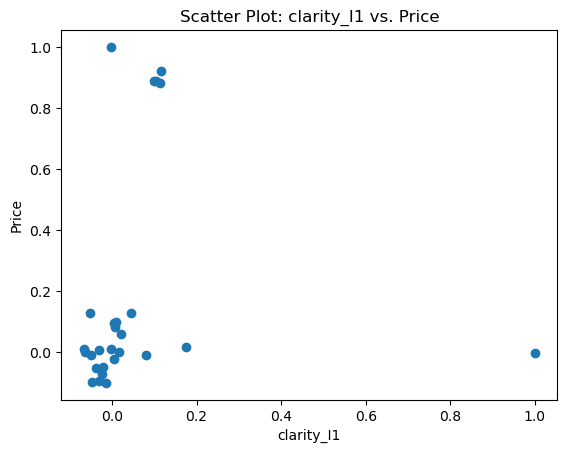

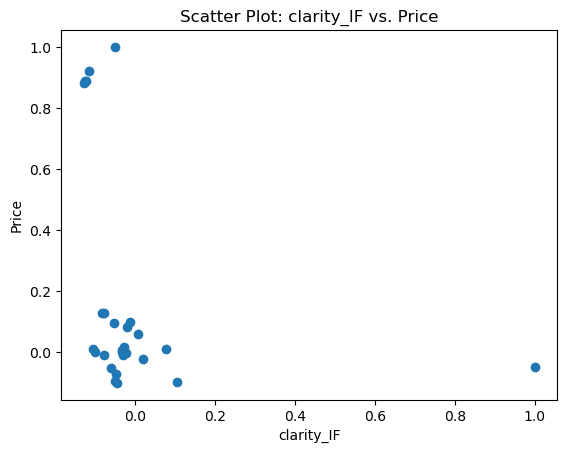

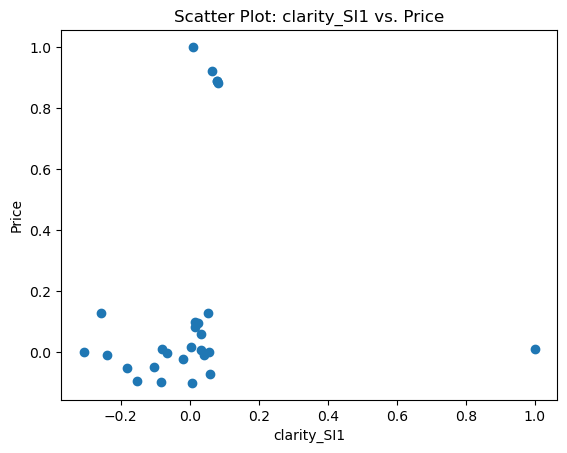

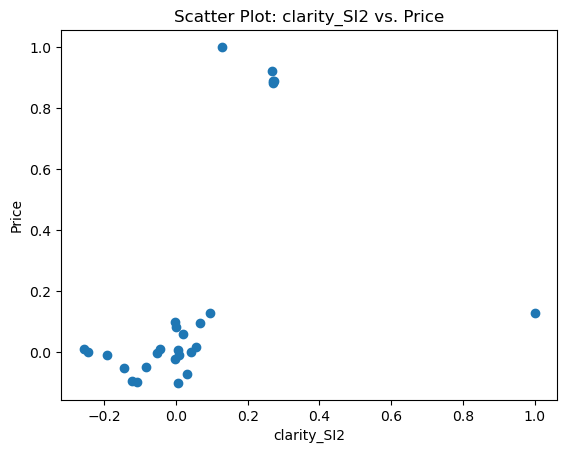

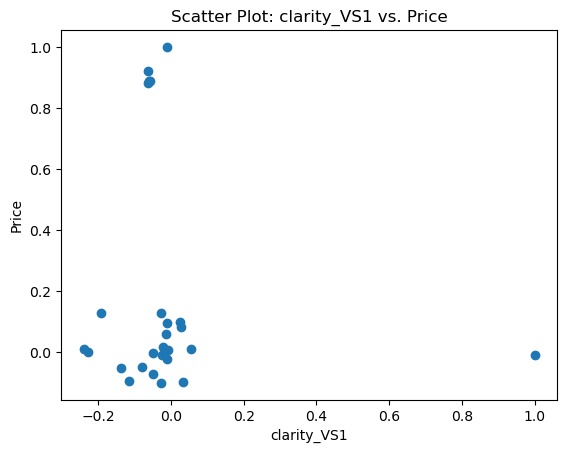

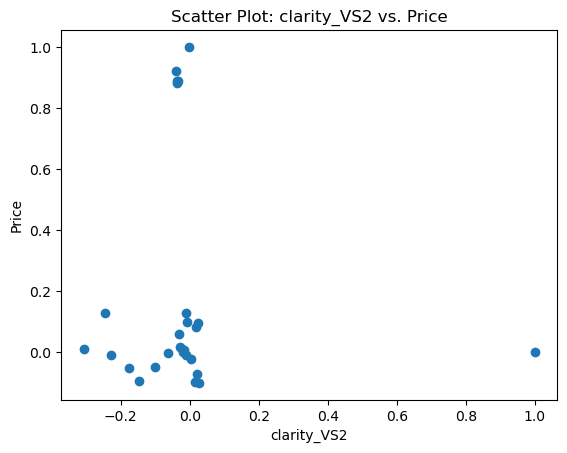

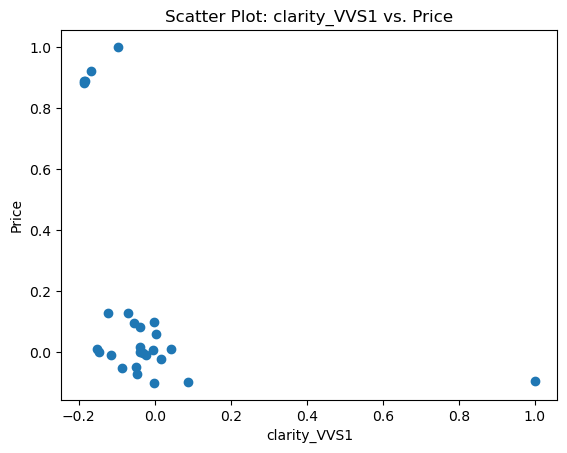

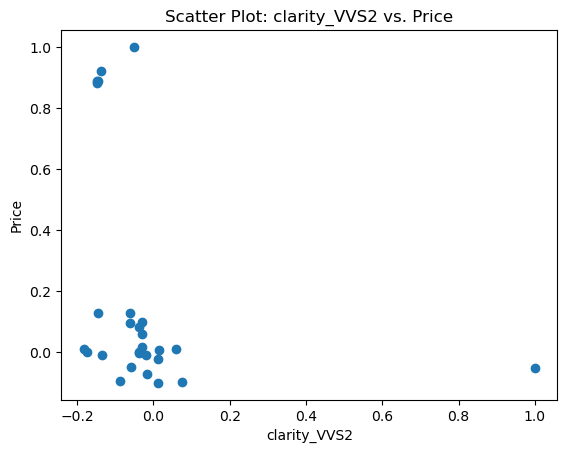

In [142]:

categorical_vars = ['cut_Fair', 'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_D', 'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J', 'clarity_I1', 'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2']

for var in categorical_vars:
    plt.figure()
    plt.scatter(df[var], df['price'])
    plt.xlabel(var)
    plt.ylabel('Price')
    plt.title('Scatter Plot: {} vs. Price'.format(var))
    plt.show()